In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('Google Ads.csv')

In [4]:
df.columns

Index(['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads',
       'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location',
       'Device', 'Keyword'],
      dtype='object')

In [5]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,Data Analytics Course,104.0,"4,498",232,14.0,7.0,0.058,"1,892",11/16/2024,Hydrabad,desktop,learn data analytics
1,A1001,Data Analytics Course,173.0,"5,107",217,10.0,8.0,0.046,"1,679",20/11/2024,Hydrabad,mobile,data analytics course
2,A1002,Data Analytics Course,90.0,4544,$203.66,26.0,9.0,NaN,"$1,624",11/16/2024,NaN,Desktop,data analitics online
3,A1003,Data Analytics Course,142.0,3185,$237.66,17.0,6.0,NaN,"$1,225",11/26/2024,NaN,tablet,data anaytics training
4,A1004,Data Analytics Course,156.0,3361,$195.90,30.0,8.0,NaN,"$1,091",11/22/2024,NaN,desktop,online data analytic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   object 
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         1728 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(4), object(9)
memory usage: 264.2+ KB


In [7]:
df.describe()

,Clicks,Leads,Conversions,Conversion Rate
count,2488.000000,2552.000000,2526.000000,1974.000000
mean,138.956994,20.003918,6.519002,0.048979
std,34.619376,6.032317,2.272573,0.019987
min,80.000000,10.000000,3.000000,0.015000
25%,110.000000,15.000000,5.000000,0.035000
50%,139.000000,20.000000,7.000000,0.046000
75%,169.000000,25.000000,9.000000,0.058000
max,199.000000,30.000000,10.000000,0.123000


In [8]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,112
Impressions,54
Cost,97
Leads,48
Conversions,74
Conversion Rate,626
Sale_Amount,139
Ad_Date,0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,0
Impressions,0
Cost,0
Leads,0
Conversions,0
Conversion Rate,0
Sale_Amount,0
Ad_Date,0


In [11]:
print(df['Ad_Date'])

0       11/16/2024
1       20/11/2024
6        6/11/2024
7       11/24/2024
9       11/12/2024
           ...    
2594     11/5/2024
2595    29/11/2024
2596    11/28/2024
2597     11/2/2024
2598     11/8/2024
Name: Ad_Date, Length: 1709, dtype: object


In [12]:
keyword_map = {
    "learn data analytics": "Data Analytics Learning",
    "data analytics course": "Data Analytics Course",
    "analytics for data": "Data Analytics Course",
    "online data analytic": "Data Analytics Online",
    "data analitics online": "Data Analytics Online",
    "data anaytics training": "Data Analytics Training"
}

# Apply mapping
df["Keyword_Clean"] = df["Keyword"].map(keyword_map)

# If any values are not in mapping, keep the original
df["Keyword_Clean"] = df["Keyword_Clean"].fillna(df["Keyword"])

# Check results
print(df[["Keyword", "Keyword_Clean"]].head(20))

                   Keyword            Keyword_Clean
0     learn data analytics  Data Analytics Learning
1    data analytics course    Data Analytics Course
6    data analytics course    Data Analytics Course
7       analytics for data    Data Analytics Course
9     online data analytic    Data Analytics Online
10    learn data analytics  Data Analytics Learning
11    online data analytic    Data Analytics Online
12   data analitics online    Data Analytics Online
13  data anaytics training  Data Analytics Training
14  data anaytics training  Data Analytics Training
15   data analytics course    Data Analytics Course
17    learn data analytics  Data Analytics Learning
20    learn data analytics  Data Analytics Learning
21   data analitics online    Data Analytics Online
22    online data analytic    Data Analytics Online
23   data analytics course    Data Analytics Course
25    learn data analytics  Data Analytics Learning
26    online data analytic    Data Analytics Online
29      anal

In [13]:
df.columns

Index(['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads',
       'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location',
       'Device', 'Keyword', 'Keyword_Clean'],
      dtype='object')

In [14]:
print(df['Keyword_Clean'])

0       Data Analytics Learning
1         Data Analytics Course
6         Data Analytics Course
7         Data Analytics Course
9         Data Analytics Online
                 ...           
2594    Data Analytics Training
2595      Data Analytics Online
2596      Data Analytics Online
2597    Data Analytics Training
2598    Data Analytics Training
Name: Keyword_Clean, Length: 1709, dtype: object


In [15]:
df.count()

,0
Ad_ID,1709
Campaign_Name,1709
Clicks,1709
Impressions,1709
Cost,1709
Leads,1709
Conversions,1709
Conversion Rate,1709
Sale_Amount,1709
Ad_Date,1709


In [16]:
df.drop(['Keyword'], axis=1, inplace=True)

In [17]:
df.columns

Index(['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads',
       'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location',
       'Device', 'Keyword_Clean'],
      dtype='object')

In [18]:
df.rename(columns={'Keyword_Clean': 'Keyword'}, inplace=True)

In [19]:
df.columns

Index(['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads',
       'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location',
       'Device', 'Keyword'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 0 to 2598
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            1709 non-null   object 
 1   Campaign_Name    1709 non-null   object 
 2   Clicks           1709 non-null   float64
 3   Impressions      1709 non-null   object 
 4   Cost             1709 non-null   object 
 5   Leads            1709 non-null   float64
 6   Conversions      1709 non-null   float64
 7   Conversion Rate  1709 non-null   float64
 8   Sale_Amount      1709 non-null   object 
 9   Ad_Date          1709 non-null   object 
 10  Location         1709 non-null   object 
 11  Device           1709 non-null   object 
 12  Keyword          1709 non-null   object 
dtypes: float64(4), object(9)
memory usage: 186.9+ KB


In [21]:
import pandas as pd

# Convert Ad_Date to datetime safely
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce')

# Clean numeric columns before converting
df['Cost'] = pd.to_numeric(df['Cost'].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)
df['Impressions'] = pd.to_numeric(df['Impressions'].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)
df['Clicks'] = pd.to_numeric(df['Clicks'].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)


In [22]:
print(df.dtypes)

Ad_ID                      object
Campaign_Name              object
Clicks                      int64
Impressions                 int64
Cost                        int64
Leads                     float64
Conversions               float64
Conversion Rate           float64
Sale_Amount                object
Ad_Date            datetime64[ns]
Location                   object
Device                     object
Keyword                    object
dtype: object


#Feature engineering
Use SQL (or Python) to create useful metrics:

CTR (Click-Through Rate) = Clicks / Impressions * 100

CPC (Cost Per Click) = Cost / Clicks

Conversion Rate (CVR) = Conversions / Clicks * 100

CPA (Cost Per Acquisition) = Cost / Conversions

ROI (Return on Investment) = (Revenue - Cost) / Cost * 100 (if revenue data available)

👉 These KPIs will be the backbone of your analysis.

In [23]:
df['CTR'] = round(df['Clicks'] / df['Impressions'] * 100 , 2)
print(df['CTR'])

0       2.31
1       3.39
6       2.59
7       3.64
9       4.95
        ... 
2594    2.23
2595    1.65
2596    4.80
2597    2.97
2598    3.35
Name: CTR, Length: 1709, dtype: float64


In [24]:
df['CPC'] = round(df['Cost'] / df['Clicks'] , 2)
print(df['CPC'])

0       2.23
1       1.25
6       2.05
7       1.25
9       1.13
        ... 
2594    2.36
2595    2.75
2596    1.61
2597    2.06
2598    1.12
Name: CPC, Length: 1709, dtype: float64


In [25]:
df['CVR'] = round(df['Conversions'] / df['Clicks'] * 100 , 2)
print(df['CVR'])

0        6.73
1        4.62
6        4.31
7        1.63
9        5.42
        ...  
2594     6.06
2595    10.23
2596     3.90
2597     3.54
2598     3.57
Name: CVR, Length: 1709, dtype: float64


In [26]:
df['CPA'] = round(df['Cost'] / df['Conversions'] , 2)
print(df['CPA'])

0       33.14
1       27.12
6       47.60
7       76.67
9       20.78
        ...  
2594    39.00
2595    26.89
2596    41.33
2597    58.25
2598    31.43
Name: CPA, Length: 1709, dtype: float64


EDA


Campaign_Name
Data Analytics Course    3.193669
Name: CTR, dtype: float64


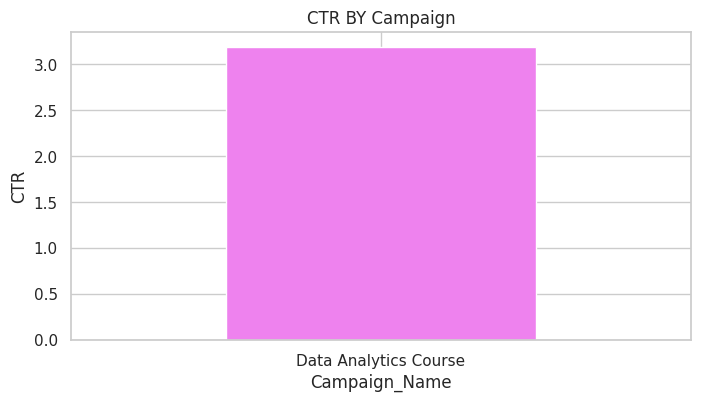

In [27]:
#CTR BY Campaign
ctr_campaign = df.groupby('Campaign_Name')['CTR'].mean().sort_values(ascending=False)
print(ctr_campaign)
ctr_campaign.plot(kind='bar', figsize=(8,4), title='CTR BY Campaign',color='violet')
plt.xticks(rotation=0)
plt.ylabel('CTR')
plt.show()

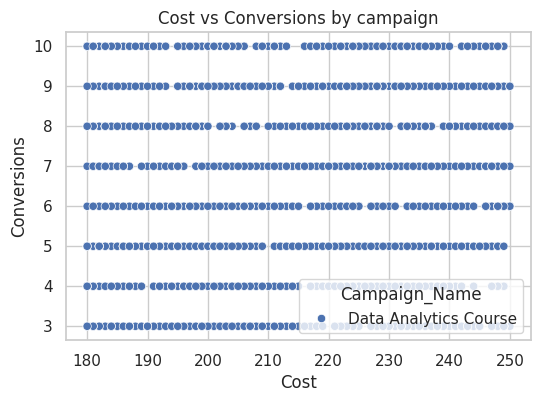

In [28]:
#cost with conversion Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x="Cost" , y="Conversions" , hue="Campaign_Name" , data=df)
plt.title('Cost vs Conversions by campaign')
plt.show()


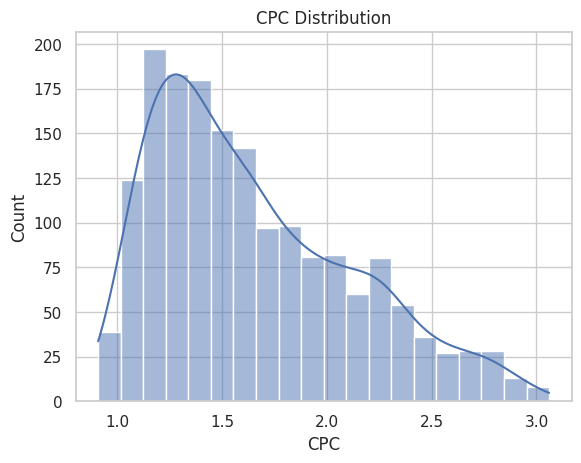

In [29]:
#CPC distribution
sns.histplot(df['CPC'], bins=20 ,kde=True)
plt.title('CPC Distribution')
plt.show()

In [30]:
#Highest CTR Campaign
print("Highest CTR Campaign:", ctr_campaign.index[0], "with CTR:", round(ctr_campaign.iloc[0],3))

Highest CTR Campaign: Data Analytics Course with CTR: 3.194


In [31]:
#Campaign with highest CPC
cpc_campaign = df.groupby('Campaign_Name')['CPC'].mean().sort_values(ascending=False)
print("Highest CPC Campaign:" , cpc_campaign.index[0] , "with CPC:" , round(cpc_campaign.iloc[0],3))

Highest CPC Campaign: Data Analytics Course with CPC: 1.651


In [32]:
top_keywords = df.groupby('Keyword')['Conversions'].sum().sort_values(ascending=False).head(10)
print(top_keywords)

Keyword
Data Analytics Course      3785.0
Data Analytics Online      3485.0
Data Analytics Learning    1991.0
Data Analytics Training    1833.0
Name: Conversions, dtype: float64


In [33]:
#CVR(Conversion Rate Analysis)
df['CTR'] = df['Clicks'] / df['Impressions'] * 100
df['CVR'] = df['Conversions'] / df['Clicks'] * 100
print("Average conversion rate:")
print(df.groupby('Campaign_Name')['CVR'].mean())


Average conversion rate:
Campaign_Name
Data Analytics Course    4.981941
Name: CVR, dtype: float64


In [34]:
#Keyword Performace using Campaign , Keywords , Ad_group
keyw_perform = df.groupby("Keyword")[["Conversions" , "Clicks" , "Cost"]].sum().sort_values("Conversions",ascending=False)
print(keyw_perform)


                         Conversions  Clicks    Cost
Keyword                                             
Data Analytics Course         3785.0   82085  125357
Data Analytics Online         3485.0   75354  116311
Data Analytics Learning       1991.0   42074   66760
Data Analytics Training       1833.0   38412   58738


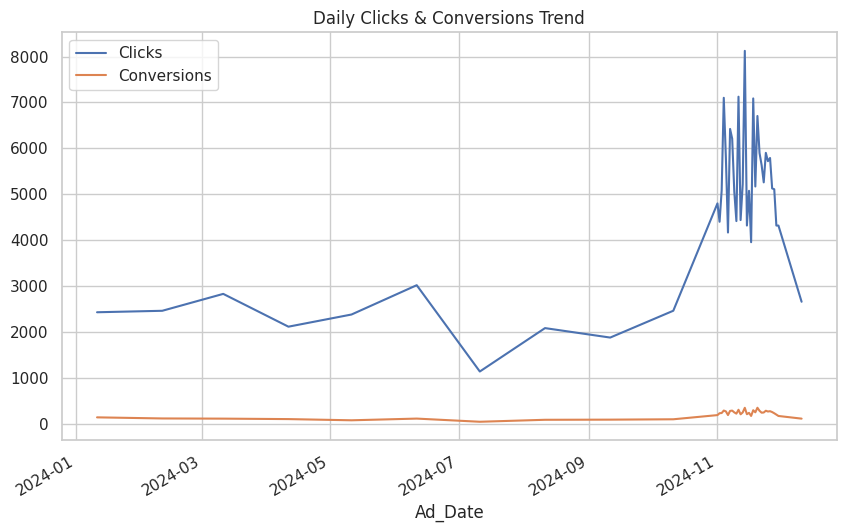

In [35]:
#Daily Performance
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'])
daily_performance = df.groupby('Ad_Date')[['Conversions', 'Clicks', 'Cost']].sum()
daily_performance.plot(y=["Clicks" , "Conversions"] , figsize=(10,6) , title = "Daily Clicks & Conversions Trend")
plt.show()

In [36]:
#Device Breakdown
if "Device" in df.columns:
    device_perf = df.groupby("Device")[["Impressions","Clicks","Conversions","Cost"]].sum()
    device_perf["CTR"] = device_perf["Clicks"] / device_perf["Impressions"] * 100
    device_perf["CVR"] = device_perf["Conversions"] / device_perf["Clicks"] * 100
    print("Device Performance:\n", device_perf, "\n")

Device Performance:
          Impressions  Clicks  Conversions    Cost       CTR       CVR
Device                                                               
desktop      2656445   81143       3864.0  125725  3.054571  4.761963
mobile       2629001   80984       3774.0  124858  3.080410  4.660180
tablet       2467409   75798       3456.0  116583  3.071967  4.559487 



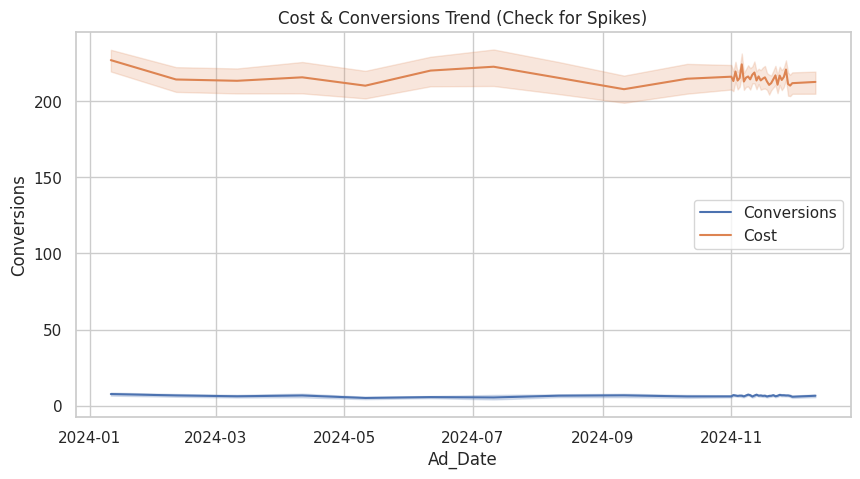

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Ad_Date", y="Conversions", data=df, label="Conversions")
sns.lineplot(x="Ad_Date", y="Cost", data=df, label="Cost")
plt.title("Cost & Conversions Trend (Check for Spikes)")
plt.legend()
plt.show()

In [38]:
df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'].str.replace(",", ""), errors='coerce').astype(int)

In [39]:
print(df['Sale_Amount'])

0       1892
1       1679
6       1640
7       1509
9       1029
        ... 
2594    1189
2595    1418
2596    1950
2597    1085
2598    1558
Name: Sale_Amount, Length: 1709, dtype: int64


In [40]:
#ROI/ROAS
df['ROAS'] = (df['Sale_Amount'] - df['Cost'])
df['ROI'] = (df['Sale_Amount'] - df['Cost']) / df['Cost'] *100
print("ROI:")
print(df.groupby("Campaign_Name")["ROI"].mean(), "\n")
"\n"
print("ROAS:")
print(df.groupby("Campaign_Name")["ROAS"].mean(), "\n")


ROI:
Campaign_Name
Data Analytics Course    601.800335
Name: ROI, dtype: float64 

ROAS:
Campaign_Name
Data Analytics Course    1279.750731
Name: ROAS, dtype: float64 



In [43]:
best_keyword = df.iloc[0]
print("\n Best Performing Keyword:", best_keyword["Keyword"])
print("ROI:", best_keyword["ROI"], "% | CPA:", best_keyword["CPA"], "| CVR:", best_keyword["CVR"], "%")


✅ Best Performing Keyword: Data Analytics Learning
ROI: 715.5172413793103 % | CPA: 33.14 | CVR: 6.730769230769231 %


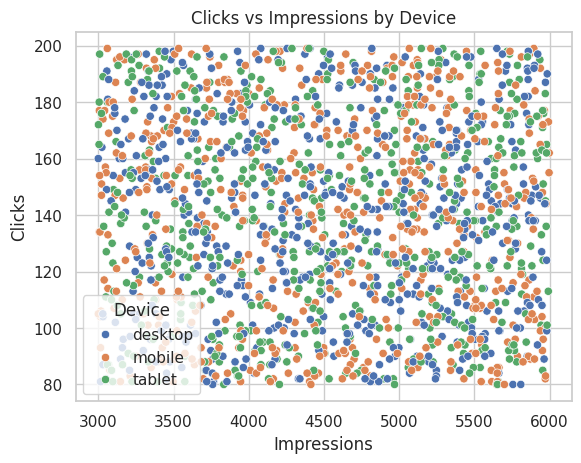

In [47]:
sns.scatterplot(x='Impressions', y='Clicks', data=df, hue='Device')
plt.title('Clicks vs Impressions by Device')
plt.show()